In [2]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [3]:
df = pd.read_csv('/Users/petrovich/Classification of documents/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [4]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [5]:
a = df.rename(columns={"Day": "Year"})
a = a.groupby(a.Year.dt.year)
res = a.mean().sort_values(by='t')

min_year = res.index[0]
max_year = res.index[-1]
print(res, "\n")

print(min_year)
print(max_year)

             t
Year          
2012  6.980822
2010  7.117808
2009  7.610959
2016  7.907104
2011  8.337912
2008  8.545205
2013  8.728767
2014  8.931507
2015  9.079452 

2012
2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [6]:
b = df[(df.Day.dt.month == 1) & (df.t >= 0)].dropna().groupby(df.Day.dt.year)
print(b.describe())
res = b.count().sort_values(by='t').index[-1]
res

         t                                              
     count      mean       std  min   25%  50%  75%  max
Day                                                     
2008  19.0  1.526316  0.904828  0.0  1.00  2.0  2.0  3.0
2009  11.0  1.636364  1.433369  0.0  0.00  2.0  2.5  4.0
2011   5.0  0.800000  0.836660  0.0  0.00  1.0  1.0  2.0
2012   6.0  0.833333  0.752773  0.0  0.25  1.0  1.0  2.0
2013   5.0  0.600000  0.894427  0.0  0.00  0.0  1.0  2.0
2014   8.0  2.750000  1.281740  1.0  1.75  3.0  4.0  4.0
2015  14.0  1.500000  1.091928  0.0  1.00  1.0  2.0  4.0
2016   5.0  3.000000  1.870829  1.0  2.00  2.0  5.0  5.0


2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [7]:
summer = [6, 7, 8]
c = df[df.Day.dt.month.isin(summer)].dropna().groupby(df.Day.dt.year)
print(c.describe())
res = c.mean().sort_values(by='t').index[0]
res

         t                                                     
     count       mean       std   min    25%   50%    75%   max
Day                                                            
2008  92.0  18.119565  3.579067  10.0  16.00  18.0  21.00  27.0
2009  92.0  18.728261  3.874695   9.0  17.00  19.0  21.00  26.0
2010  92.0  22.119565  6.199685  10.0  17.00  22.0  27.00  34.0
2011  91.0  21.318681  4.531076  13.0  18.00  21.0  24.00  31.0
2012  92.0  19.086957  3.867737  12.0  16.00  18.5  22.00  31.0
2013  92.0  21.543478  3.686665  14.0  19.00  21.0  24.00  31.0
2014  92.0  20.706522  5.603253  10.0  16.00  20.0  25.25  31.0
2015  92.0  19.032609  3.256274  12.0  16.75  19.0  21.25  27.0
2016  92.0  19.326087  4.188180   9.0  17.00  20.0  22.00  30.0


2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [51]:
d = abs(df['t'].diff()).sort_values().dropna().index[-1]-1
df['Day'][d].date()

datetime.date(2014, 5, 26)

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

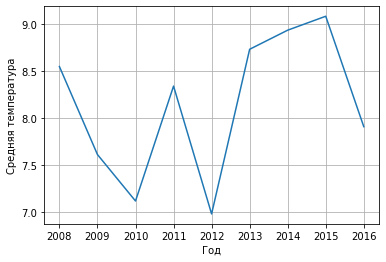

In [126]:
e = df.rename(columns={"Day": "Year"})
e = df.groupby(e.Year.dt.year).t
res = e.mean()

res.plot()
plt.ylabel("Средняя температура")
plt.xlabel("Год")
plt.grid()